In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data_ibm_wmt = yf.download(tickers= 'IBM WMT', period= '5y',interval = '1d',rounding=True)
data_ibm_wmt

[*********************100%***********************]  2 of 2 completed


Price        Close           High            Low           Open         \
Ticker         IBM    WMT     IBM    WMT     IBM    WMT     IBM    WMT   
Date                                                                     
2020-01-28  105.73  36.06  106.42  36.15  105.12  35.86  105.69  35.87   
2020-01-29  104.32  35.84  105.75  36.22  104.25  35.84  105.44  36.05   
2020-01-30  103.62  36.05  103.77  36.10  102.26  35.67  103.61  35.75   
2020-01-31  108.89  35.41  109.14  35.95  106.67  35.22  108.26  35.81   
2020-02-03  110.82  35.34  111.58  35.68  109.02  35.29  109.29  35.53   
...            ...    ...     ...    ...     ...    ...     ...    ...   
2025-01-22  223.26  93.23  224.40  94.00  220.35  92.52  221.98  93.77   
2025-01-23  226.04  93.81  226.04  93.81  223.15  92.32  223.94  92.96   
2025-01-24  224.80  94.76  226.81  95.01  223.80  93.46  225.27  93.54   
2025-01-27  224.13  97.40  224.30  97.46  219.84  94.82  222.19  95.90   
2025-01-28  224.71  97.64  225.33  97.79  221.77  96.89  224.32  97.23   

Price         Volume            
Ticker           IBM       WMT  
Date                            
2020-01-28   3610374  15810600  
2020-01-29   3194275  11326500  
2020-01-30   5290563  13744500  
2020-01-31  19868352  23327400  
2020-02-03   9295488  13041300  
...              ...       ...  
2025-01-22   4759500  15567100  
2025-01-23   3619700  14198400  
2025-01-24   3232900  14973800  
2025-01-27   4896300  18871000  
2025-01-28   1163048   5833680  

[1258 rows x 10 columns]

In [5]:
# Extraer precios de cierre ajustados
combined_data = data_ibm_wmt["Close"]

combined_data.dropna(inplace=True)

print(combined_data.head())

Ticker         IBM    WMT
Date                     
2020-01-28  105.73  36.06
2020-01-29  104.32  35.84
2020-01-30  103.62  36.05
2020-01-31  108.89  35.41
2020-02-03  110.82  35.34


C:\Users\lalo1\AppData\Local\Temp\ipykernel_7768\3982009953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.dropna(inplace=True)


Coeficiente de correlación entre IBM y Walmart: 0.9274


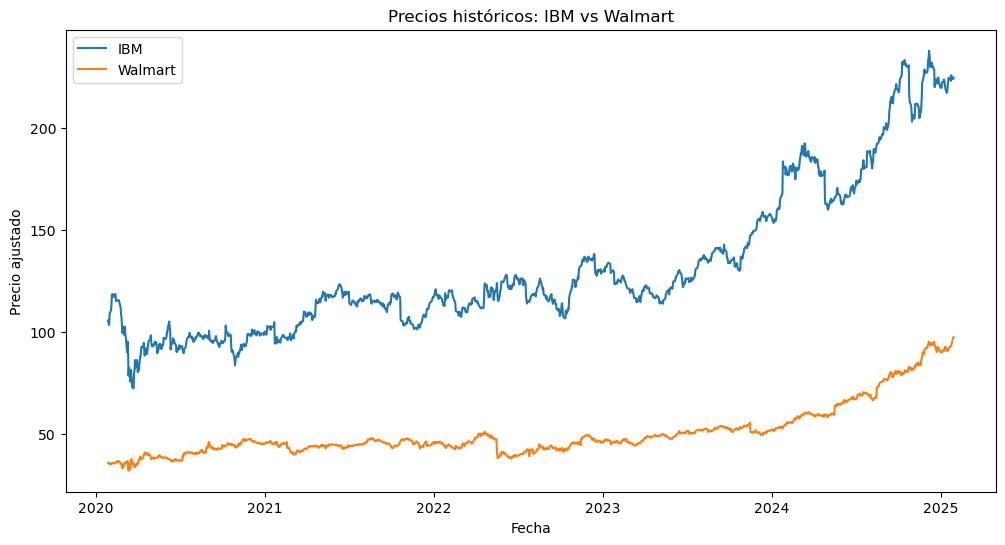

In [7]:
# Correlación entre IBM y Walmart
correlation = combined_data.corr().iloc[0, 1]
print(f"Coeficiente de correlación entre IBM y Walmart: {correlation:.4f}")

# Gráfico de precios históricos
plt.figure(figsize=(12, 6))
plt.plot(combined_data["IBM"], label="IBM")
plt.plot(combined_data["WMT"], label="Walmart")
plt.title("Precios históricos: IBM vs Walmart")
plt.xlabel("Fecha")
plt.ylabel("Precio ajustado")
plt.legend()
plt.show()


Por el coeficiente que tenemos que es de 0.9274 nos da que tiene una correlacion positiva, entre los precios de las acciones de IBM y Walmart. Esto significa que, en general, cuando los precios de una acción suben, los precios de la otra también tienden a subir de manera similar.


--- Descomposición para IBM ---


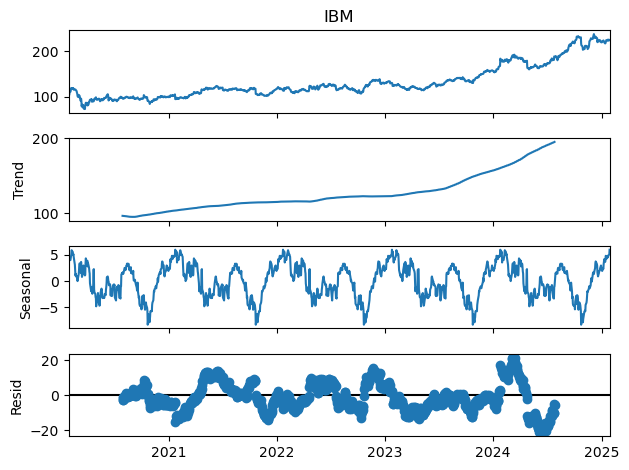


--- Descomposición para WMT ---


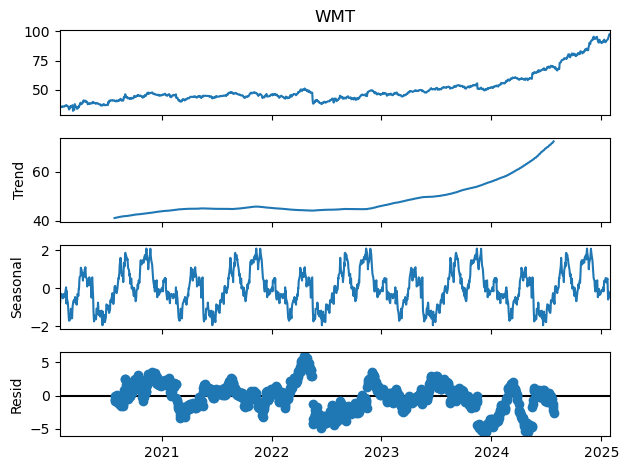


Correlograma para WMT


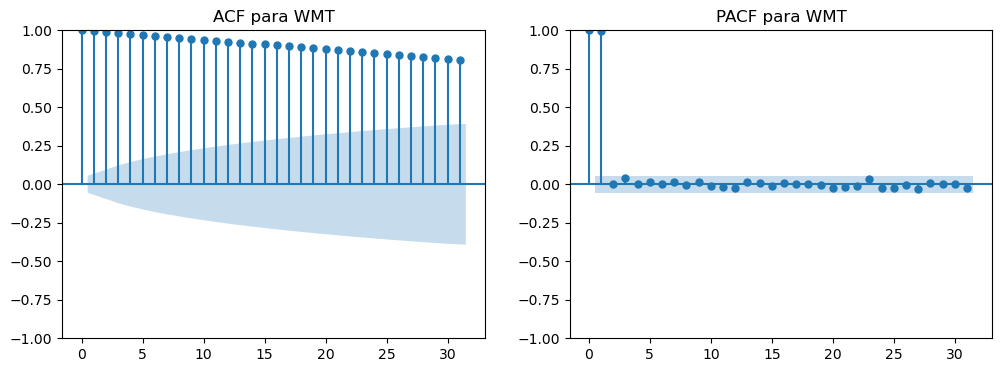

In [9]:
# Descomposición de series y correlogramas
for company in combined_data.columns:
    print(f"\n--- Descomposición para {company} ---")
    decomposition = seasonal_decompose(combined_data[company], model="additive", period=252)
    decomposition.plot()
    plt.show()

# Correlograma (ACF y PACF)
print(f"\nCorrelograma para {company}")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(combined_data[company], ax=axes[0])
plot_pacf(combined_data[company], ax=axes[1])
axes[0].set_title(f"ACF para {company}")
axes[1].set_title(f"PACF para {company}")
plt.show()

Por la descomposicion de IMB y WMT, se oberva que son muy similares el como actua una y otra, la unica diferencia es el volumeen de cada una de ellas, pero en general es muy similar

In [11]:
# Prueba de Dickey-Fuller
for company in combined_data.columns:
    print(f"\n--- Prueba de Dickey-Fuller para {company} ---")
    result = adfuller(combined_data[company])
    print(f"Estadístico ADF: {result[0]:.4f}")
    print(f"Valor p: {result[1]:.4f}")
    print("Valores críticos:")
    for key, value in result[4].items():
        print(f"  {key}: {value:.4f}")
    if result[1] < 0.05:
        print("La serie es estacionaria (rechazamos la hipótesis nula).")
    else:
        print("La serie no es estacionaria (no rechazamos la hipótesis nula).")



--- Prueba de Dickey-Fuller para IBM ---
Estadístico ADF: 0.3513
Valor p: 0.9796
Valores críticos:
  1%: -3.4356
  5%: -2.8639
  10%: -2.5680
La serie no es estacionaria (no rechazamos la hipótesis nula).

--- Prueba de Dickey-Fuller para WMT ---
Estadístico ADF: 2.3909
Valor p: 0.9990
Valores críticos:
  1%: -3.4356
  5%: -2.8639
  10%: -2.5680
La serie no es estacionaria (no rechazamos la hipótesis nula).



--- Análisis de promedios móviles para IBM ---

--- Análisis de promedios móviles para WMT ---


C:\Users\lalo1\AppData\Local\Temp\ipykernel_7768\396415111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data[f"{company}_MA"] = combined_data[company].rolling(window=window).mean()
C:\Users\lalo1\AppData\Local\Temp\ipykernel_7768\396415111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data[f"{company}_MA"] = combined_data[company].rolling(window=window).mean()


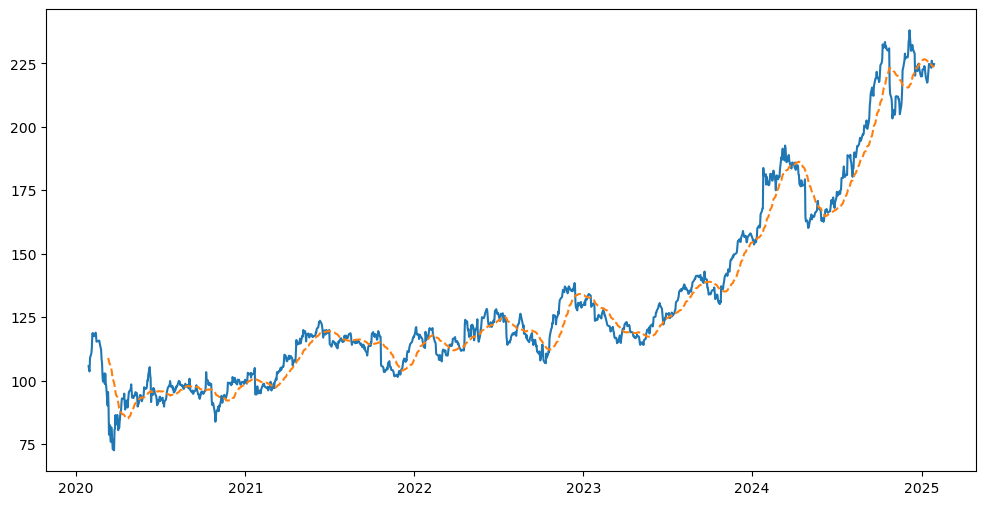

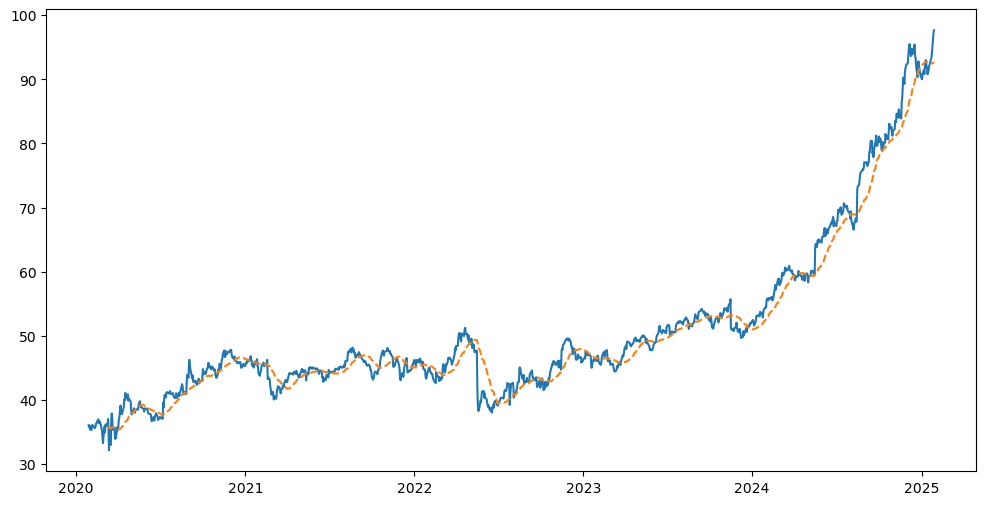

In [13]:
# Promedios móviles y pronóstico
window = 30  # Ventana para el promedio móvil

for company in combined_data.columns:
    print(f"\n--- Análisis de promedios móviles para {company} ---")
    combined_data[f"{company}_MA"] = combined_data[company].rolling(window=window).mean()

    # Gráfico de promedio móvil
    plt.figure(figsize=(12, 6))
    plt.plot(combined_data[company], label=f"{company} - Original")
    plt.plot(combined_data[f"{company}_MA"], label=f"{company} - Promedio móvil ({window} días)", linestyle="--")
    plt.title

Viendo nuestro pronostico, va a la alza, es bueno invertir, en el sentido de parte de la tecnologia y por los cambisoq ue llevamos dia a dia, IBM es muy buena opcion de inversion, ahora bien como hemos visto la relacion que tien walmart con IBM, podremos observar que tambien es bueno la inversion en ella, tambien crece

# Conclusiones:
El coeficiente de correlación de 0.9274 obtenido indica una fuerte relación positiva entre los precios históricos de las acciones de IBM y Walmart durante los últimos cinco años. Esto sugiere que los movimientos de precio de ambas empresas están estrechamente relacionados, probablemente influenciados por factores comunes del mercado financiero, como cambios en las condiciones económicas, tendencias del mercado bursátil o políticas monetarias.

* No implica causalidad: Una alta correlación no significa que los precios de una empresa afecten directamente los precios de la otra.
* Diferencias estructurales: IBM y Walmart operan en sectores completamente diferentes (tecnología y retail, respectivamente), lo que destaca la influencia de factores macroeconómicos sobre las empresas más allá de su modelo de negocio específico.
* Importancia de diversificación: A pesar de la correlación alta, para un portafolio bien diversificado, las acciones en sectores diferentes como tecnología y retail siguen ofreciendo beneficios, ya que responden de manera distinta a shocks específicos de la industria.